## INTRODUCTION

### Project Overview 
#### In the current business environment, great customer service is crucial for creating brand loyalty and keeping customers happy. This project looks at Customer Support Data gathered from various service interactions through different channels. The dataset provides important information about how well customer support works, how agents perform, and how satisfied customers are.

### Objective
####   This Data Analysis project seeks to find patterns, connections, and possible issues that affect customer experience. By using these insights, companies can make informed choices to improve their support services, speed up response times, and increase customer satisfaction.

#### first we have to import all the libraries 

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


#### import the dataframes using read_csv() function and print the dataframe using .to_sting () function

In [54]:
df = pd.read_csv("E:\DATAANALYTICS\DATA SET\Customer_support_data.csv")
#print (df.to_string())


#### print first 10 rows and last 10 rows 

In [55]:
print(df.head(10))
print(df.tail(10))

                              Unique id channel_name           category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall    Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall    Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound      Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound            Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound       Cancellation   
5  1cfde5b9-6112-44fc-8f3b-892196137a62        Email            Returns   
6  11a3ffd8-1d6b-4806-b198-c60b5934c9bc      Outcall    Product Queries   
7  372b51a5-fa19-4a31-a4b8-a21de117d75e      Inbound            Returns   
8  6e4413db-4e16-42fc-ac92-2f402e3df03c      Inbound            Returns   
9  b0a65350-64a5-4603-8b9a-a24a4a145d08      Inbound  Shopzilla Related   

                   Sub-category  \
0                Life Insurance   
1  Product Specific Information   
2             Installation/demo   
3        Reverse Pickup Enquiry   

#### check the info of the data frame 

In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [57]:
columns_to_drop =["connected_handling_time"]
df = df.drop(columns = columns_to_drop,axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique id             85907 non-null  object 
 1   channel_name          85907 non-null  object 
 2   category              85907 non-null  object 
 3   Sub-category          85907 non-null  object 
 4   Customer Remarks      28742 non-null  object 
 5   Order_id              67675 non-null  object 
 6   order_date_time       17214 non-null  object 
 7   Issue_reported at     85907 non-null  object 
 8   issue_responded       85907 non-null  object 
 9   Survey_response_Date  85907 non-null  object 
 10  Customer_City         17079 non-null  object 
 11  Product_category      17196 non-null  object 
 12  Item_price            17206 non-null  float64
 13  Agent_name            85907 non-null  object 
 14  Supervisor            85907 non-null  object 
 15  Manager            

#### to drop all null values in the data frame

In [59]:
df.dropna().sum()

Unique id               4c28acf4-2ea4-4be8-b8f1-113e676fc8b76e51734e-9...
channel_name            InboundInboundInboundInboundInboundInboundInbo...
category                Order RelatedOrder RelatedOrder RelatedReturns...
Sub-category            DelayedInstallation/demoOrder status enquiryFr...
Customer Remarks        Very badAll goodIssue not resolved pathetic se...
Order_id                55bbace3-eb2e-4f67-aacb-4f8ee8512f758a1ae638-4...
order_date_time         19-07-2023 23:5018-07-2023 12:2029-07-2023 13:...
Issue_reported at       02-08-2023 10:4402-08-2023 20:0302-08-2023 11:...
issue_responded         02-08-2023 11:1402-08-2023 20:0502-08-2023 11:...
Survey_response_Date    02-Aug-2302-Aug-2302-Aug-2302-Aug-2301-Aug-230...
Customer_City           NAGPURNAGPURNEW DELHIFARIDABADKANYAKUMARIPATTA...
Product_category        LifeStyleElectronicsMobileLifeStyleFurnitureMo...
Item_price                                                     33605430.0
Agent_name              Stanley HoganD

#### to check the total null cells in the dataframe

In [60]:
df.isna().sum().sum()

np.int64(350330)

In [61]:
print(df.isna().sum())

Unique id                   0
channel_name                0
category                    0
Sub-category                0
Customer Remarks        57165
Order_id                18232
order_date_time         68693
Issue_reported at           0
issue_responded             0
Survey_response_Date        0
Customer_City           68828
Product_category        68711
Item_price              68701
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure Bucket               0
Agent Shift                 0
CSAT Score                  0
dtype: int64


#### fill all the whitespaces using under score

In [62]:
df = df.rename(columns={'Unique id' : 'Unique_id','Customer Remarks' : "Customer_Remarks", "Agent Shift" : "Agent_Shift","CSAT Score" : "CSAT_Score","Issue_reported at" : "Issue_reported_at","Tenure Bucket" : "Tenure_Bucket"})

In [63]:
print(df.isna().sum())

Unique_id                   0
channel_name                0
category                    0
Sub-category                0
Customer_Remarks        57165
Order_id                18232
order_date_time         68693
Issue_reported_at           0
issue_responded             0
Survey_response_Date        0
Customer_City           68828
Product_category        68711
Item_price              68701
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure_Bucket               0
Agent_Shift                 0
CSAT_Score                  0
dtype: int64


#### changing data types of the column 

In [64]:
df["Agent_Shift"] = df["Agent_Shift"].astype("string")
df["Unique_id"] = df["Unique_id"].astype("string")
df["channel_name"] = df["channel_name"].astype("string")
df["category"] = df["category"].astype("string")
df["Order_id"] = df["Order_id"].astype("string")
df["Sub-category"] = df["Sub-category"].astype("string")
df["Customer_Remarks"] = df["Customer_Remarks"].astype("string")
df["order_date_time"] = df["order_date_time"].astype("datetime64[ns]")
df["Issue_reported_at"] = df["Issue_reported_at"].astype("datetime64[ns]")
df["issue_responded"] = df["issue_responded"].astype("datetime64[ns]")
df["Survey_response_Date"] = df["Survey_response_Date"].astype("datetime64[ns]")
df["Customer_City"] = df["Customer_City"].astype("string")
df["Product_category"] = df["Product_category"].astype("string")
df["Agent_name"] = df["Agent_name"].astype("string")
df["Supervisor"] = df["Supervisor"].astype("string")
df["Manager"] = df["Manager"].astype("string")
df["Agent_Shift"] = df["Agent_Shift"].astype("string")

# Define logical order for Tenure_Bucket ranges
tenure_bucket_order = ["On Job Training", "0-30", "31-60", "61-90", ">90"]
# Convert Tenure_Bucket to a categorical data type with specified order
df["Tenure_Bucket"] = pd.Categorical(df["Tenure_Bucket"], categories=tenure_bucket_order, ordered=True)

df["Item_price"] = df['Item_price'].round().astype('Int64')



In [65]:
# Preprocessing the dataset

# Convert date columns to datetime format
date_columns = ["order_date_time", "Issue_reported_at", "Survey_response_Date", "issue_responded"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Check for missing values and fill/drop where appropriate
missing_summary = df.isnull().sum()

# Adding derived columns (e.g., response time, issue duration)
df["response_time"] = (df["issue_responded"] - df["Issue_reported_at"]).dt.total_seconds()
df["survey_delay"] = (df["Survey_response_Date"] - df["Issue_reported_at"]).dt.days

# Convert categorical data to categories
categorical_columns = ["channel_name", "category", "Sub-category", "Tenure_Bucket", "Agent_Shift"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

# Replace missing item prices with the median
df["Item_price"] = df["Item_price"].fillna(df["Item_price"].median())

# Generate a summary of the cleaned data
df.info(), missing_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unique_id             85907 non-null  string        
 1   channel_name          85907 non-null  category      
 2   category              85907 non-null  category      
 3   Sub-category          85907 non-null  category      
 4   Customer_Remarks      28742 non-null  string        
 5   Order_id              67675 non-null  string        
 6   order_date_time       17214 non-null  datetime64[ns]
 7   Issue_reported_at     85907 non-null  datetime64[ns]
 8   issue_responded       85907 non-null  datetime64[ns]
 9   Survey_response_Date  85907 non-null  datetime64[ns]
 10  Customer_City         17079 non-null  string        
 11  Product_category      17196 non-null  string        
 12  Item_price            85907 non-null  Int64         
 13  Agent_name      

(None,
 Unique_id                   0
 channel_name                0
 category                    0
 Sub-category                0
 Customer_Remarks        57165
 Order_id                18232
 order_date_time         68693
 Issue_reported_at           0
 issue_responded             0
 Survey_response_Date        0
 Customer_City           68828
 Product_category        68711
 Item_price              68701
 Agent_name                  0
 Supervisor                  0
 Manager                     0
 Tenure_Bucket               0
 Agent_Shift                 0
 CSAT_Score                  0
 dtype: int64)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unique_id             85907 non-null  string        
 1   channel_name          85907 non-null  category      
 2   category              85907 non-null  category      
 3   Sub-category          85907 non-null  category      
 4   Customer_Remarks      28742 non-null  string        
 5   Order_id              67675 non-null  string        
 6   order_date_time       17214 non-null  datetime64[ns]
 7   Issue_reported_at     85907 non-null  datetime64[ns]
 8   issue_responded       85907 non-null  datetime64[ns]
 9   Survey_response_Date  85907 non-null  datetime64[ns]
 10  Customer_City         17079 non-null  string        
 11  Product_category      17196 non-null  string        
 12  Item_price            85907 non-null  Int64         
 13  Agent_name      

#### plotinting a box plot to find if there is any outlayers in the dataframe

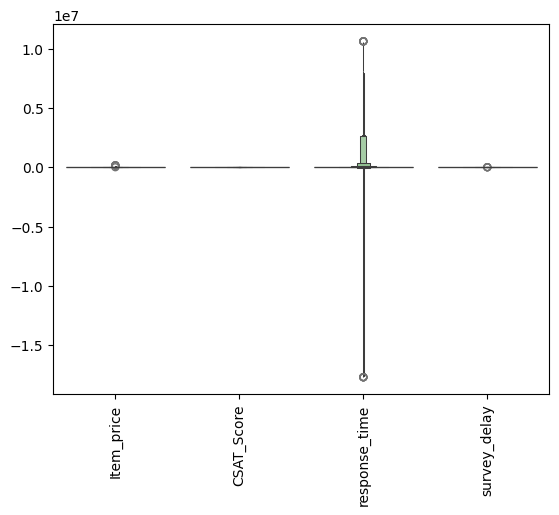

In [67]:
sns.boxenplot(df)
plt.xticks(rotation=90)
plt.show()

#### removing outliers

In [68]:
df['z_score'] = (df['Item_price'] - df['Item_price'].mean()) / df['Item_price'].std()
threshold=2
df = df[df["z_score"].abs() <= threshold]
df = df.drop(columns=["z_score"])


In [69]:
#df['z_score'] = (df['response_time'] - df['response_time'].mean()) / df['response_time'].std()
#threshold=1.5
#df = df[df["z_score"].abs() <= threshold]
#df = df.drop(columns=["z_score"])

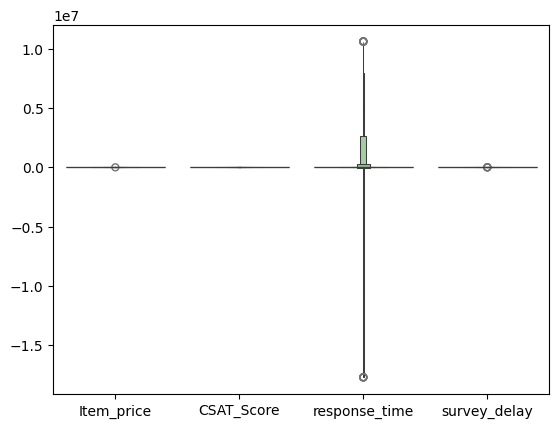

In [70]:
sns.boxenplot(df)
#plt.xticks(rotation=90)
plt.show()

### Statistical Analysis

find correlation this corr() method calculates the relationship between each columns in your data set

In [71]:
print(df.corr(numeric_only=True))

               Item_price  CSAT_Score  response_time  survey_delay
Item_price       1.000000   -0.051120       0.009643     -0.014863
CSAT_Score      -0.051120    1.000000      -0.006862     -0.012496
response_time    0.009643   -0.006862       1.000000      0.124642
survey_delay    -0.014863   -0.012496       0.124642      1.000000


In [72]:
print(df.cov(numeric_only=True))

                 Item_price    CSAT_Score  response_time  survey_delay
Item_price     1.430638e+06    -83.149725   1.398861e+07 -1.123314e+03
CSAT_Score    -8.314972e+01      1.849338  -1.131773e+04 -1.073796e+00
response_time  1.398861e+07 -11317.732655   1.471079e+12  9.552702e+06
survey_delay  -1.123314e+03     -1.073796   9.552702e+06  3.992867e+03


In [73]:
df.describe()

,order_date_time,Issue_reported_at,issue_responded,Survey_response_Date,Item_price,CSAT_Score,response_time,survey_delay
count,15047,83740,83740,83740,83740.0,83740.000000,8.374000e+04,83740.000000
mean,2023-07-02 12:27:04.577656832,2023-08-03 15:03:39.477907968,2023-08-03 21:12:18.288750592,2023-08-16 11:39:36.326725376,1115.633461,4.262957,2.211881e+04,12.486995
min,2022-01-07 07:00:00,2023-01-08 00:00:00,2023-01-08 00:00:00,2023-08-01 00:00:00,0.0,1.000000,-1.771188e+07,-119.000000
25%,2023-05-08 21:39:30,2023-08-13 12:17:45,2023-08-13 14:33:45,2023-08-09 00:00:00,979.0,4.000000,1.200000e+02,-1.000000
50%,2023-07-25 15:03:00,2023-08-21 10:41:00,2023-08-21 12:31:30,2023-08-17 00:00:00,979.0,5.000000,3.000000e+02,-1.000000
75%,2023-08-16 12:32:30,2023-08-28 13:14:00,2023-08-28 00:00:00,2023-08-24 00:00:00,979.0,5.000000,1.860000e+03,0.000000
max,2023-12-08 23:55:00,2023-12-08 23:59:00,2023-12-08 23:59:00,2023-08-31 00:00:00,13990.0,5.000000,1.062582e+07,208.000000
std,NaN,NaN,NaN,NaN,1196.092978,1.359904,1.212881e+06,63.189133


## EDA project Quesions

#### 1. Distribution of Customer Satisfaction (CSAT) Scores

In [74]:
csat_distribution = df["CSAT_Score"].value_counts()
print(csat_distribution)

CSAT_Score
5    58532
4    10977
1    10523
3     2473
2     1235
Name: count, dtype: int64


#### 2. Average response time by channel

In [75]:
avg_response_by_channel = df.groupby("channel_name")["response_time"].mean()
print(avg_response_by_channel)


channel_name
Email      36104.863350
Inbound    21293.725343
Outcall    23146.562586
Name: response_time, dtype: float64


C:\Users\saran\AppData\Local\Temp\ipykernel_14592\3159417087.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_response_by_channel = df.groupby("channel_name")["response_time"].mean()


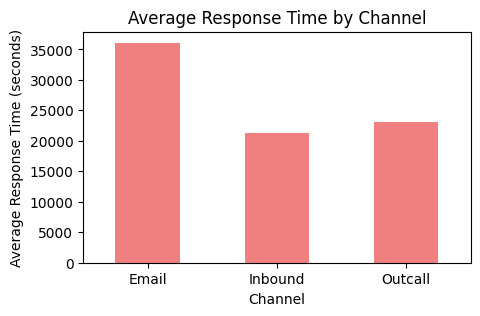

In [76]:
plt.figure(figsize=(5,3))
avg_response_by_channel.plot(kind='bar', color='lightcoral')
plt.title("Average Response Time by Channel")
plt.xlabel("Channel")
plt.ylabel("Average Response Time (seconds)")
plt.xticks(rotation=0)
plt.show()

#### 3. Average item price by category

In [77]:

avg_price_by_category = df.groupby("category")["Item_price"].mean()
print(avg_price_by_category)


category
App/website                 979.0
Cancellation          1390.249879
Feedback              1069.456647
Offers & Cashback     1163.811816
Onboarding related          979.0
Order Related         1209.361823
Others                 987.572917
Payments related       991.231602
Product Queries         988.64489
Refund Related         1187.67575
Returns                1076.47885
Shopzilla Related      981.534842
Name: Item_price, dtype: Float64


C:\Users\saran\AppData\Local\Temp\ipykernel_14592\1295103207.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_category = df.groupby("category")["Item_price"].mean()


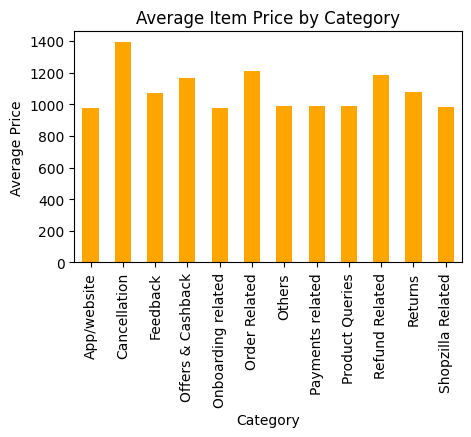

In [78]:
plt.figure(figsize=(5,3))
avg_price_by_category.plot(kind='bar', color='orange')
plt.title("Average Item Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

#### 4. Proportion of issues by category


In [79]:
issue_proportion_by_category = df["category"].value_counts(normalize=True) * 100
print(issue_proportion_by_category)


category
Returns               51.973967
Order Related         26.337473
Refund Related         5.214951
Product Queries        4.405302
Shopzilla Related      3.324576
Payments related       2.758538
Feedback               2.685694
Cancellation           2.461189
Offers & Cashback      0.545737
Others                 0.114641
App/website            0.100310
Onboarding related     0.077621
Name: proportion, dtype: float64


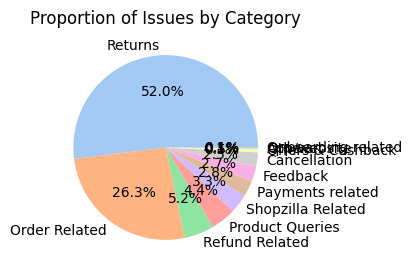

In [80]:
plt.figure(figsize=(5, 3))
issue_proportion_by_category.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Proportion of Issues by Category")
plt.ylabel("")
plt.show()

#### 5. Top 5 most common product categories


In [81]:
top_product_categories = df["Product_category"].value_counts().head(5)
print(top_product_categories)

Product_category
Electronics                    4271
LifeStyle                      4112
Books & General merchandise    3306
Home                           1328
Home Appliences                 854
Name: count, dtype: Int64


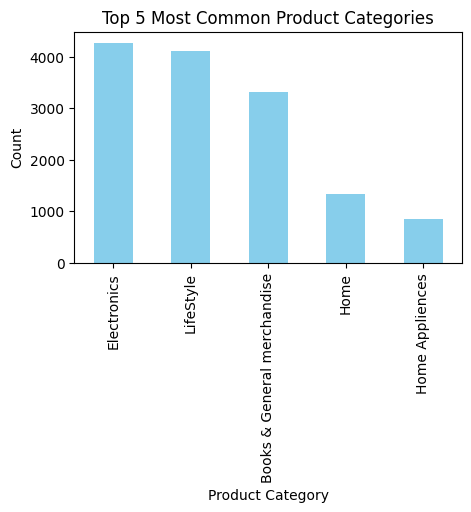

In [82]:
plt.figure(figsize=(5, 3))
top_product_categories.plot(kind='bar', color='skyblue')
plt.title("Top 5 Most Common Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

#### 6. Issues reported by city (top 5 cities)


In [83]:

top_cities_by_issues = df["Customer_City"].value_counts().head(5)
print(top_cities_by_issues)

Customer_City
HYDERABAD    598
NEW DELHI    595
PUNE         356
MUMBAI       321
BANGALORE    311
Name: count, dtype: Int64


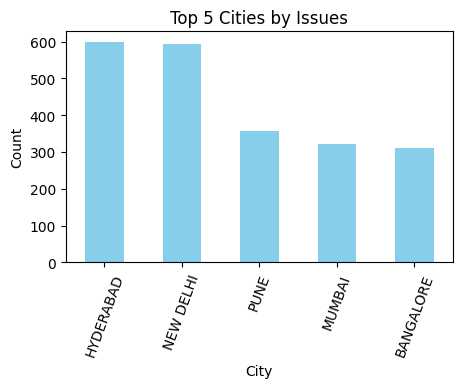

In [84]:
plt.figure(figsize=(5,3))
top_cities_by_issues.plot(kind='bar', color='skyblue')
plt.title("Top 5 Cities by Issues")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

#### 7. Average CSAT score by agent shift


In [85]:
avg_csat_by_shift = df.groupby("Agent_Shift")["CSAT_Score"].mean()
print(avg_csat_by_shift)

Agent_Shift
Afternoon    4.311266
Evening      4.296008
Morning      4.211320
Night        4.316159
Split        4.445096
Name: CSAT_Score, dtype: float64


C:\Users\saran\AppData\Local\Temp\ipykernel_14592\4098371683.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_csat_by_shift = df.groupby("Agent_Shift")["CSAT_Score"].mean()


#### 8. Survey delay by tenure bucket


In [86]:
# 8. Survey delay by tenure bucket
avg_survey_delay_by_tenure = df.groupby("Tenure_Bucket")["survey_delay"].mean()
print(avg_survey_delay_by_tenure)

Tenure_Bucket
On Job Training     4.211484
0-30               15.635351
31-60              17.743689
61-90              13.570600
>90                15.998532
Name: survey_delay, dtype: float64


C:\Users\saran\AppData\Local\Temp\ipykernel_14592\2420734041.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_survey_delay_by_tenure = df.groupby("Tenure_Bucket")["survey_delay"].mean()


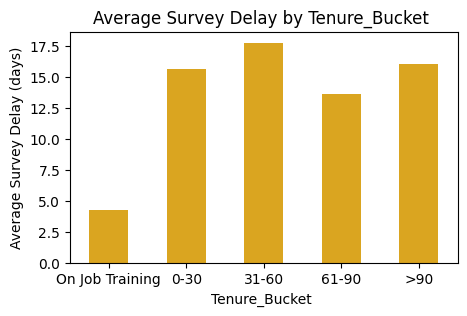

In [87]:
plt.figure(figsize=(5, 3))
avg_survey_delay_by_tenure.plot(kind='bar', color='goldenrod')
plt.title("Average Survey Delay by Tenure_Bucket ")
plt.xlabel("Tenure_Bucket ")
plt.ylabel("Average Survey Delay (days)")
plt.xticks(rotation=0)
plt.show()

#### 9. Distribution of response times


In [88]:
response_time_distribution = df["response_time"].describe()
print(response_time_distribution)

count    8.374000e+04
mean     2.211881e+04
std      1.212881e+06
min     -1.771188e+07
25%      1.200000e+02
50%      3.000000e+02
75%      1.860000e+03
max      1.062582e+07
Name: response_time, dtype: float64


#### 10. Relationship between item price and CSAT score


In [89]:
correlation_price_csat = df["Item_price"].corr(df["CSAT_Score"])
print(correlation_price_csat)


-0.0511196369431551


#### 11. CSAT scores by sub-category


In [90]:
csat_by_sub_category = df.groupby("Sub-category")["CSAT_Score"].mean().head(5)
print(csat_by_sub_category)

C:\Users\saran\AppData\Local\Temp\ipykernel_14592\3080674987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  csat_by_sub_category = df.groupby("Sub-category")["CSAT_Score"].mean().head(5)


Sub-category
Account updation       3.820000
Affiliate Offers       4.111765
App/website Related    4.400000
Billing Related        4.614035
COD Refund Details     3.952941
Name: CSAT_Score, dtype: float64


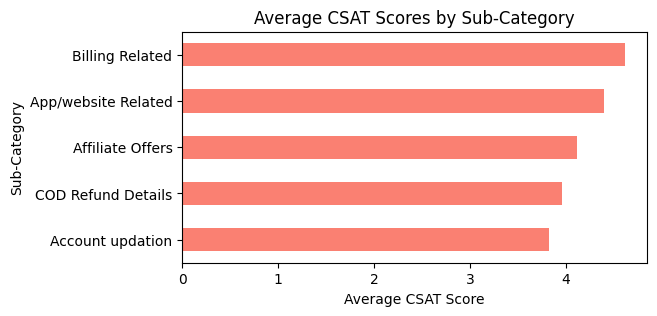

In [91]:
plt.figure(figsize=(6,3))
csat_by_sub_category.sort_values().plot(kind='barh', color='salmon')
plt.title("Average CSAT Scores by Sub-Category")
plt.xlabel("Average CSAT Score")
plt.ylabel("Sub-Category")
plt.show()

#### 12. Count of orders with missing order date


In [92]:
missing_order_dates = df["order_date_time"].isnull().sum()
print(missing_order_dates)


68693


#### 13. Issues by tenure bucket


In [93]:
issues_by_tenure = df["Tenure_Bucket"].value_counts()
print(issues_by_tenure)

Tenure_Bucket
>90                29968
On Job Training    24938
31-60              11330
0-30               10953
61-90               6551
Name: count, dtype: int64


#### 14. Most common supervisors handling issues


In [94]:
top_supervisors = df["Supervisor"].value_counts().head(5)
print(top_supervisors)

Supervisor
Carter Park         4169
Elijah Yamaguchi    3777
Nathan Patel        3456
Zoe Yamamoto        3451
Noah Patel          3347
Name: count, dtype: Int64


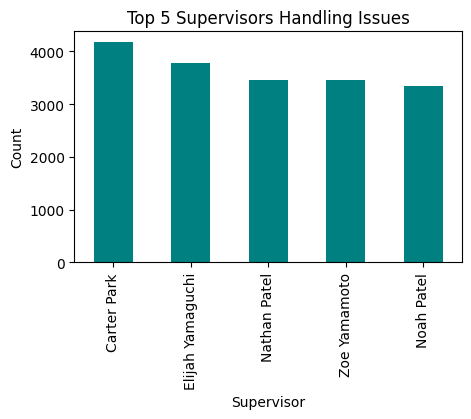

In [95]:
plt.figure(figsize=(5,3))
top_supervisors.plot(kind='bar', color='teal')
plt.title("Top 5 Supervisors Handling Issues")
plt.xlabel("Supervisor")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

#### 15. Agent performance: average CSAT by agent

In [96]:
avg_csat_by_agent = df.groupby("Agent_name")["CSAT_Score"].mean().sort_values(ascending=False).head(5)
print(avg_csat_by_agent)

Agent_name
Pamela Robinson    4.956522
Virginia Lane      4.909091
Sean Gay           4.909091
Taylor Nelson      4.888889
Hunter Hoffman     4.872727
Name: CSAT_Score, dtype: float64


## Summary

##### This project aimed to study a Customer Support Dataset that includes different details about how customers interact with the support team. The dataset features information on customer problems, agent effectiveness, and satisfaction ratings from various communication methods like phone, email, and chat.

##### The main goal of this analysis was to uncover what affects customer satisfaction and to find any issues that slow down service efficiency. By analyzing customer behavior and assessing agent performance, companies can develop strategies to improve the customer experience and make support processes more efficient.

## Findings

##### Communication methods such as Email and Chat showed slower response times than Phone, suggesting possible delays in non-instant communication. Quicker responses were usually linked to greater customer satisfaction, highlighting the need for prompt support.

##### Agents who have been with the company longer and those on the evening shift performed better in response time and customer satisfaction scores. Some agents regularly achieved high customer satisfaction scores, indicating that their techniques could serve as a standard for training other agents.



## Suggesions

#####  1. Aim to shorten response times, especially for email and chat, by adding more resources or using automated tools.
#####  2. Use knowledge from successful agents to create focused training programs for new or struggling agents.
#####  3. Some product categories, especially expensive items, showed notable delays. This might need extra checks or higher-level support.
#####  4. Use active communication methods for important problems or delays to set customer expectations and boost satisfaction.


### Businesses can use the knowledge gained from this project to boost their customer support, improve service quality, and build better relationships with customers.